# 🚢 Titanic - Previsão de Sobreviventes com Random Forest

Este projeto aplica técnicas de **análise exploratória de dados (EDA)**, **engenharia de atributos**, **normalização**, **balanceamento de classes**, **Random Forest Classifier com ajuste de hiperparâmetros**, **validação cruzada** e **avaliação de métricas com AUC, GINI e KS** para prever quais passageiros sobreviveram ao naufrágio do Titanic.

---

## 📂 Dataset

O dataset utilizado é o clássico **Titanic** da competição do [Kaggle](https://www.kaggle.com/c/titanic), contendo 891 passageiros. As colunas principais são:

| Coluna          | Descrição                                                         |
| --------------- | ----------------------------------------------------------------- |
| **PassengerId** | Identificador único de cada passageiro                            |
| **Survived**    | Variável alvo: 0 = Não sobreviveu, 1 = Sobreviveu                 |
| **Pclass**      | Classe do bilhete (1ª, 2ª ou 3ª classe)                           |
| **Name**        | Nome completo do passageiro                                       |
| **Sex**         | Gênero: male ou female                                            |
| **Age**         | Idade do passageiro                                               |
| **SibSp**       | Número de irmãos/cônjuges a bordo                                 |
| **Parch**       | Número de pais/filhos a bordo                                     |
| **Ticket**      | Número do bilhete                                                 |
| **Fare**        | Valor pago pela passagem                                          |
| **Cabin**       | Código da cabine (muitos nulos)                                   |
| **Embarked**    | Porto de embarque: C = Cherbourg, Q = Queenstown, S = Southampton |

---

## 🔄 Pipeline de Modelagem

1. **Carregamento de Dados**

   * Dataset importado diretamente via URL.

2. **Análise Inicial**

   * Informativos de estrutura, tipos e valores nulos.

3. **Visualização de Outliers**

   * Geração de boxplots para `Age`, `Fare`, `SibSp`, `Parch`.

4. **Heatmap de Correlação**

   * Correlação entre variáveis numéricas + dummies.

5. **Engenharia de Atributos**

   * `FamilySize`: `SibSp + Parch`
   * `IsAlone`: indica se o passageiro viajava sozinho
   * `Age*Class`: interação entre idade e classe social

6. **Tratamento de Valores Nulos**

   * `Age` e `Fare`: preenchidos com mediana
   * `Embarked`: preenchido com moda

7. **Transformação e Normalização**

   * `Fare`: transformado com `np.log1p()` para suavizar outliers
   * `StandardScaler`: normaliza variáveis numéricas

8. **Codificação**

   * `Sex`, `Embarked`: convertidas em dummies com `drop_first`

9. **Balanceamento com SMOTE**

   * Corrige desequilíbrio entre classes da variável `Survived`

10. **Divisão de Dados**

    * `train_test_split` com 80% treino e 20% teste

11. **Otimização de Hiperparâmetros**

    * `GridSearchCV` sobre:

      * `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `class_weight`, `bootstrap`

12. **Treinamento**

    * Modelo Random Forest com os melhores parâmetros encontrados

13. **Avaliação Ponto-a-Ponto**

    * `classification_report`
    * `confusion_matrix`
    * `ROC AUC`, `GINI`, `KS` (Kolmogorov-Smirnov)
    * Curva ROC

14. **Validação Cruzada com Múltiplas Métricas**

    * `cross_validate` com 10 folds usando:

      * `accuracy`, `precision`, `recall`, `f1`, `roc_auc`
    * Visualização com `barplot` e `boxplot`

---


## 🔹 Visualizações Incluídas

* Boxplots de outliers
* Heatmap de correlação
* Matriz de confusão
* Importância das variáveis
* Curva ROC
* Métricas da validação cruzada (barplot + boxplot)

---

## 📊 Régua Visual de Avaliação de Métricas de Classificação

| Métrica          | O que mede                                           | Quando usar                                                        | Interpretação (Régua de Qualidade)                                                                               |
| ---------------- | ---------------------------------------------------- | ------------------------------------------------------------------ | ---------------------------------------------------------------------------------------------------------------- |
| **🌟 Acurácia**  | Proporção total de acertos (positivos e negativos)   | Quando as classes estão **bem balanceadas**                        | ✅ > 0.85 (excelente)<br>🟡 0.75–0.85 (ok)<br>🔴 < 0.75 (baixo)                                                   |
| **🌟 Precision** | % de positivos previstos que são realmente positivos | Quando **falsos positivos são mais graves** (ex: crédito, prisões) | ✅ > 0.80 (alta confiança)<br>🟡 0.65–0.80 (cuidado)<br>🔴 < 0.65 (alerta de ruído)                               |
| **🌟 Recall**    | % de positivos reais identificados corretamente      | Quando **falsos negativos são mais graves** (ex: doenças, fraudes) | ✅ > 0.80 (ótima cobertura)<br>🟡 0.65–0.80 (aceitável)<br>🔴 < 0.65 (perigo de omissão)                          |
| **🌟 F1-Score**  | Equilíbrio entre Precision e Recall                  | Quando FP e FN têm **peso similar** ou dados estão desbalanceados  | ✅ > 0.80 (robusto)<br>🟡 0.70–0.80 (ok)<br>🔴 < 0.70 (desequilíbrio crítico)                                     |
| **📈 AUC (ROC)** | Capacidade geral de separação das classes            | Para avaliar **modelo em vários thresholds** (independe de corte)  | ✅ > 0.90 (excelente)<br>🟡 0.80–0.90 (bom)<br>🔴 < 0.80 (fraco ou aleatório)                                     |
| **📊 GINI**      | Variante do AUC: `2*AUC - 1`                         | Muito usado em **score de crédito, churn, risco**                  | ✅ > 0.60 (ótimo)<br>🟡 0.40–0.60 (moderado)<br>🔴 < 0.40 (baixa separação)                                       |
| **📉 KS**        | Distância entre distribuições acumuladas             | Ideal para **modelos de crédito, retenção, churn**                 | ✅ > 0.60 (separação excelente)<br>🟡 0.40–0.60 (adequado)<br>🟠 0.20–0.40 (fraco)<br>🔴 < 0.20 (quase aleatório) |

---


## 🧠 Conclusão

O projeto demonstra como **engenharia de features**, **balanceamento de classes** e **validação cuidadosa** elevam o desempenho de modelos mesmo com algoritmos clássicos. Com um AUC de 0.92 e GINI de 0.84, o modelo se mostra robusto para classificação binária.


In [41]:
# Realizando Importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
import warnings
import matplotlib
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.stats import ks_2samp
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

In [42]:
# 🔹 Função para carregar o dataset Titanic
def carregar_dataset():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url)

    print("📌 Primeiras 5 linhas do dataset Titanic:")
    print(df.head(), "\n")

    print("📌 Informações ANTES do tratamento de valores nulos:")
    print(df.info(), "\n")

    print("🔍 Quantidade de valores ausentes por coluna:")
    print(df.isnull().sum(), "\n")

    print("📈 Estatísticas descritivas do dataset:")
    print(df.describe(include='all'), "\n")

    return df

In [43]:
# 🔹 Função para identificar outliers usando o método IQR
def detectar_outliers(df, colunas):
    for col in colunas:
        plt.figure(figsize=(6, 2))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot de {col}")
        plt.show()

In [44]:
# 🔍 Heatmap com TODAS as variáveis (numéricas + dummies)
def gerar_heatmap_completo(df):
    df_convertido = df.copy()
    df_convertido['Age'] = df_convertido['Age'].fillna(df_convertido['Age'].median())
    df_convertido['Embarked'] = df_convertido['Embarked'].fillna(df_convertido['Embarked'].mode()[0])
    df_convertido['Fare'] = df_convertido['Fare'].fillna(df_convertido['Fare'].median())
    df_convertido['Fare'] = np.log1p(df_convertido['Fare'])
    df_convertido['FamilySize'] = df_convertido['SibSp'] + df_convertido['Parch']
    df_convertido['IsAlone'] = ((df_convertido['SibSp'] + df_convertido['Parch']) == 0).astype(int)
    df_convertido['Age*Class'] = df_convertido['Age'] * df_convertido['Pclass']
    df_convertido = pd.get_dummies(df_convertido, columns=['Sex', 'Embarked'], drop_first=True)
    df_convertido.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')
    plt.figure(figsize=(14, 10))
    sns.heatmap(df_convertido.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Matriz de Correlação com Variáveis Numéricas e Categóricas (dummies)")
    plt.tight_layout()
    plt.show()

In [45]:
# 🔹 Função para tratar os dados
def preprocessar_dados(df):
    colunas_utilizadas = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age',
                          'SibSp', 'Parch', 'Fare', 'Embarked']
    df = df[colunas_utilizadas].copy()

    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Fare'] = np.log1p(df['Fare'])

    df['FamilySize'] = df['SibSp'] + df['Parch']
    df['IsAlone'] = ((df['SibSp'] + df['Parch']) == 0).astype(int)
    df['Age*Class'] = df['Age'] * df['Pclass']
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

    scaler = StandardScaler()
    colunas_numericas = ['Age', 'Fare', 'FamilySize', 'Age*Class']
    df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

    X = df.drop(columns=['Survived', 'PassengerId'])
    y = df['Survived']

    print("📈 Informações DEPOIS do tratamento de valores nulos:")
    print(df.info(), "\n")

    print("📈 Estatísticas descritivas do dataset:")
    print(df.describe(include='all'), "\n")
    
    return X, y

In [46]:
# 🔹 Otimização de hiperparâmetros com GridSearch
def otimizar_hyperparametros(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True],
        'class_weight': [None, 'balanced']
    }

    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"🏆 Melhor combinação de hiperparâmetros: {grid_search.best_params_}\n")
    return grid_search.best_estimator_

In [47]:
# 🔹 Treinamento do modelo
def treinar_modelo(X_train, y_train, modelo):
    modelo.fit(X_train, y_train)
    return modelo

In [48]:
# 🔹 Avaliação do modelo
def avaliar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(f"✅ Acurácia: {accuracy_score(y_test, y_pred):.4f}\n")
    print("📊 Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title("Matriz de Confusão")
    plt.show()

In [ ]:
# 🔹 Visualização da importância das features
def visualizar_importancia(modelo, X_train):
    importances = modelo.feature_importances_
    plt.figure(figsize=(10, 5))
    sns.barplot(x=importances, y=X_train.columns, palette="viridis")
    plt.title("Importância das Features")
    plt.show()

📌 Primeiras 5 linhas do dataset Titanic:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0      

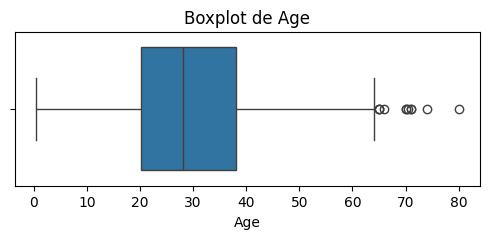

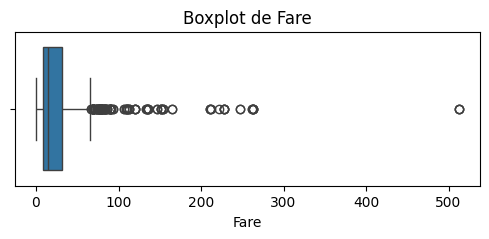

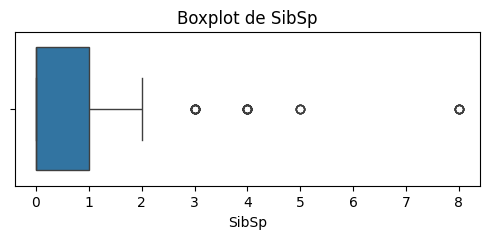

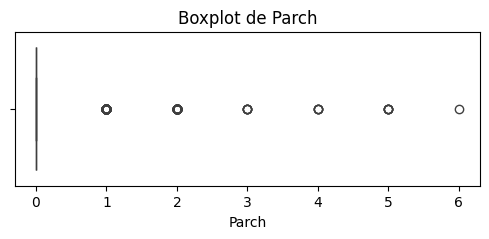

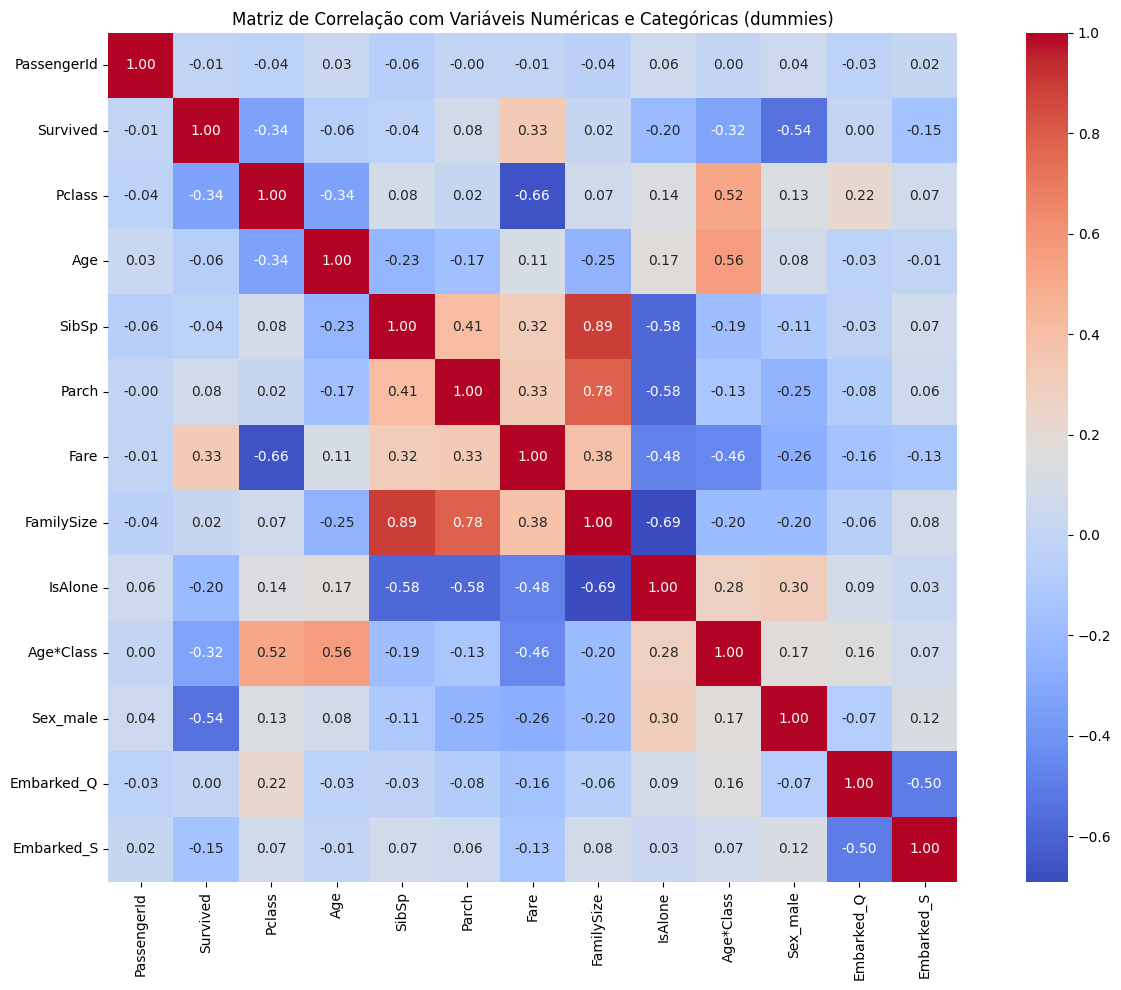

📈 Informações DEPOIS do tratamento de valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   FamilySize   891 non-null    float64
 8   IsAlone      891 non-null    int64  
 9   Age*Class    891 non-null    float64
 10  Sex_male     891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(4), int64(6)
memory usage: 72.3 KB
None 

📈 Estatísticas descritivas do dataset:
        PassengerId    Survived      Pclass           Age       SibSp  \
count    891.000000  891.000000  

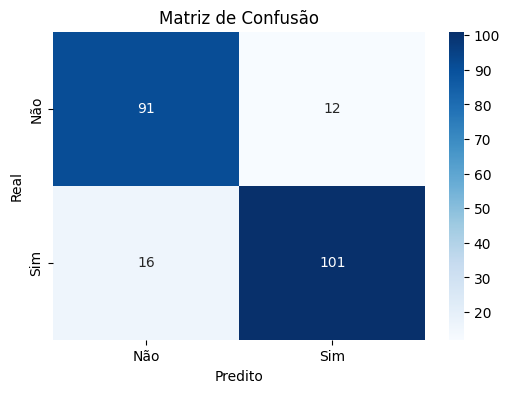

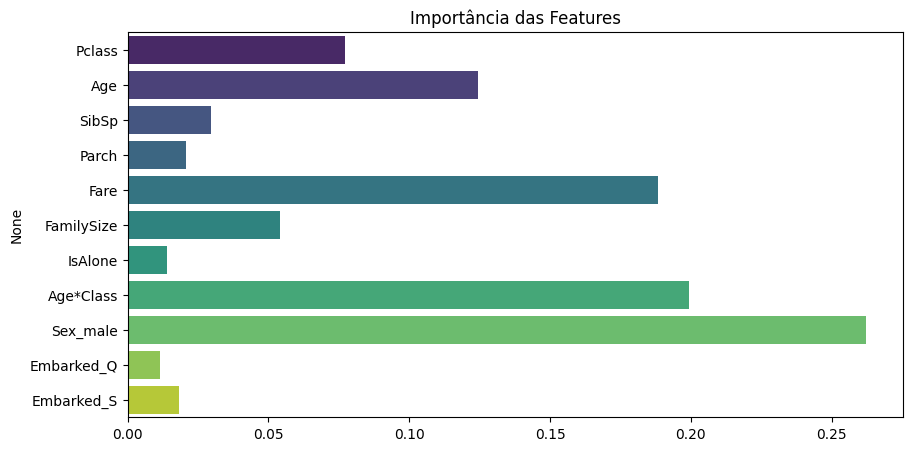

In [58]:
# 🚀 Execução principal
df = carregar_dataset()
detectar_outliers(df, ['Age', 'Fare', 'SibSp', 'Parch'])
gerar_heatmap_completo(df)
X, y = preprocessar_dados(df)

# Aplicando SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
melhor_modelo = otimizar_hyperparametros(X_train, y_train)
modelo_treinado = treinar_modelo(X_train, y_train, melhor_modelo)
avaliar_modelo(modelo_treinado, X_test, y_test)
visualizar_importancia(modelo_treinado, X_train)

In [51]:
# Probabilidades
y_proba = modelo_treinado.predict_proba(X_test)[:, 1]

# AUC e GINI
auc = roc_auc_score(y_test, y_proba)
gini = 2 * auc - 1
print(f"📐 AUC-ROC: {auc:.4f}")
print(f"📊 GINI: {gini:.4f}")

📐 AUC-ROC: 0.9210
📊 GINI: 0.8421


In [52]:
# KS
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
ks_stat = max(tpr - fpr)
print(f"🧪 KS: {ks_stat:.4f}")

🧪 KS: 0.7553


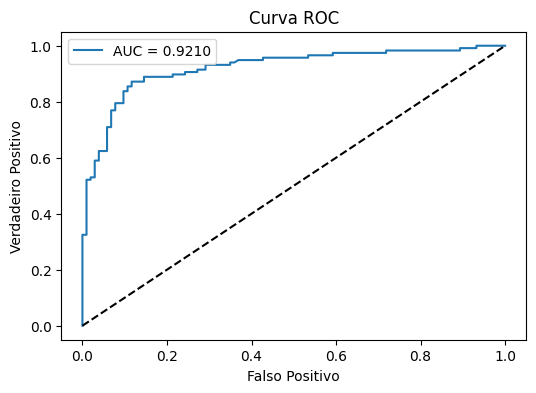

In [53]:
# Curva ROC
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC")
plt.legend()
plt.show()

In [54]:
# Define o modelo base (sem duplicar random_state)
modelo = RandomForestClassifier(**melhor_modelo.get_params())

# Executa validação cruzada com múltiplas métricas
resultados = cross_validate(
    modelo,
    X_resampled,
    y_resampled,
    cv=10,  # Número de folds
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=True
)

In [55]:
# Exibe os resultados médios
print("📊 Resultados da Validação Cruzada (10 folds):")
for metrica in resultados:
    if "test" in metrica:
        print(f"{metrica}: {np.mean(resultados[metrica]):.4f}")

# Resultados médios da validação cruzada (substitua se tiver seus próprios)
resultados_cv = {
    'Métrica': ['Acurácia', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Valor': [0.8388, 0.8519, 0.8214, 0.8350, 0.9006]
}

df_resultados = pd.DataFrame(resultados_cv)

📊 Resultados da Validação Cruzada (10 folds):
test_accuracy: 0.8388
test_precision: 0.8519
test_recall: 0.8214
test_f1: 0.8350
test_roc_auc: 0.9006


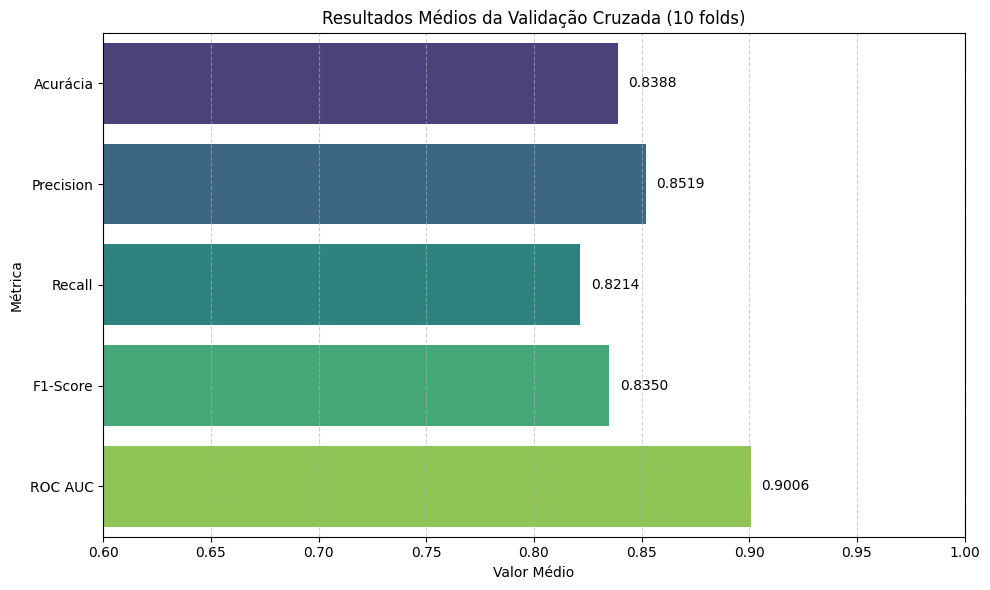

In [56]:
# Barplot com os valores médios
plt.figure(figsize=(10, 6))
sns.barplot(x='Valor', y='Métrica', data=df_resultados, palette='viridis')
plt.title("Resultados Médios da Validação Cruzada (10 folds)")
plt.xlabel("Valor Médio")
plt.xlim(0.6, 1.0)
for i, v in enumerate(df_resultados['Valor']):
    plt.text(v + 0.005, i, f"{v:.4f}", va='center')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

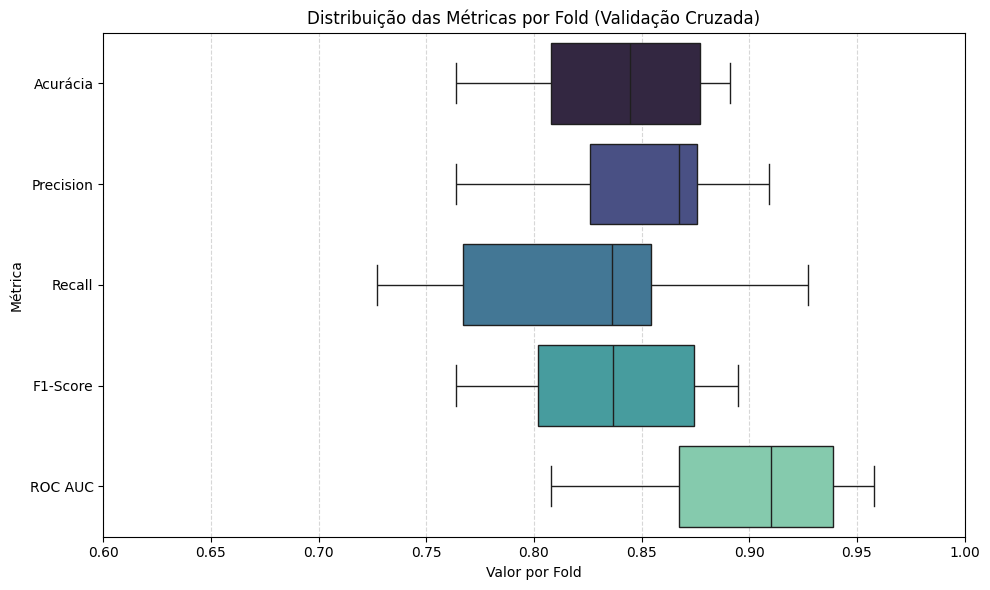

In [57]:
# Converte para DataFrame
df_folds = pd.DataFrame({
    'Acurácia': resultados['test_accuracy'],
    'Precision': resultados['test_precision'],
    'Recall': resultados['test_recall'],
    'F1-Score': resultados['test_f1'],
    'ROC AUC': resultados['test_roc_auc']
})

# Transforma para formato longo
df_folds_long = df_folds.melt(var_name='Métrica', value_name='Valor')

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Valor', y='Métrica', data=df_folds_long, palette='mako')
plt.title("Distribuição das Métricas por Fold (Validação Cruzada)")
plt.xlabel("Valor por Fold")
plt.xlim(0.6, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()